# K-Means Clustering

### Content:
- Prepare for Clustering
- K-Means Algorithm
- Plotting the Clusters
- Descriptive Statistics
- Merge Cluster Column Back to Original Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#display all visualizations
%matplotlib inline

In [3]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Used Car Sales Analysis/'

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_scores.csv'), index_col = [0])

In [5]:
df_cars.head()

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,price_score
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,7.1450,22.727273,3.693389
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,Low Price,Low Mileage,3.9212,27.272727,4.678813
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,9.7702,27.272727,3.693389
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,Low Price,Low Mileage,7.9844,22.727273,4.736596
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,Low Price,Low Mileage,4.4284,13.636364,6.714732


### Prepare for Clustering

In [6]:
#drop categorical columns for k-means, only keep the variables to scale
df_cluster = df_cars.drop(columns = ['Price','Year','Mileage','City','State','Make','Model','Price_Flag','Mileage_Flag'])

In [7]:
#use the elbow technique to determine the optimal number of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
#scores for rates of variation for different numbers of clusters
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))]

score

[-363287140.64473736,
 -182256775.2018342,
 -125327024.0612541,
 -91209105.81937043,
 -77974142.08209196,
 -66562035.96580677,
 -58358404.493873864,
 -53212755.325456716,
 -49323406.3586072]

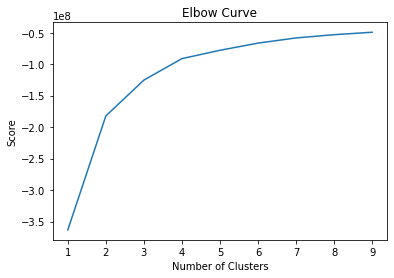

In [9]:
#plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There appears to be a subtle kink point in the curve at 4 clusters. So for our k-means algorithm, we'll use 4 clusters as the optimal number of clusters.

### K-Means Algorithm

In [10]:
#run k-means algo
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [11]:
#fit the kmeans object to our data
kmeans.fit(df_cluster)

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [12]:
#column for which cluster the observation belongs to
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [13]:
df_cluster.head()

,mileage_score,year_score,price_score,clusters
0,7.1450,22.727273,3.693389,0
1,3.9212,27.272727,4.678813,0
2,9.7702,27.272727,3.693389,2
3,7.9844,22.727273,4.736596,0
4,4.4284,13.636364,6.714732,0


In [14]:
df_cluster['clusters'].value_counts()

0    475877
2    201162
1    100609
3     74444
Name: clusters, dtype: int64

### Plotting the Clusters

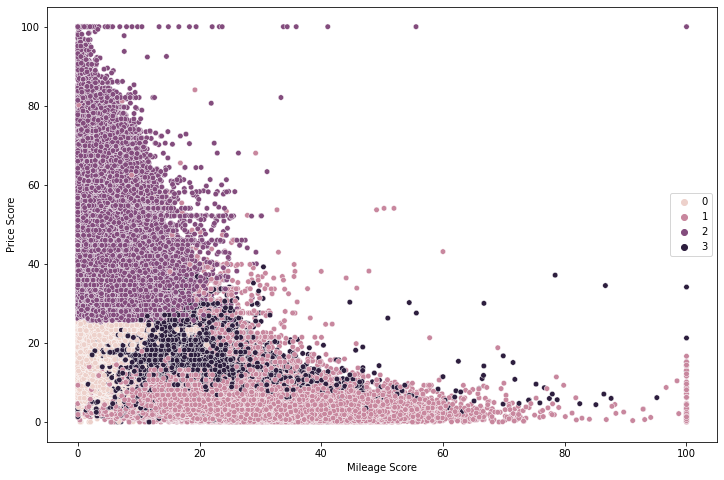

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['mileage_score'], y=df_cluster['price_score'], hue=kmeans.labels_, s=30) 
ax.grid(False)
plt.xlabel('Mileage Score')
plt.ylabel('Price Score')
plt.show()

Note the following: 
- A high price score represents a car that has a high price compared to other cars listed with the same make.
- A high mileage score represents a car with a high mileage.

There are two clusters that follow expected behavior given the relationship between price and mileage. The regular purple cluster groups cars with low milage and high price for its make, while the dark pink cluster groups cars with high mileage and low price for its make. 

The other two slightly deviate from the linear relationship we would expect; the light pink cluster groups cars with a very low mileage score, but maintain a low price relative to its make. The dark purple cluster follows the same as the light pink, but with a bit higher of a mileage score.

One thing to note here is that three of the clusters all seem to cap their price score around 30. Where they end is where the regular purple cluster begins, with price scores of 30 or higher. 

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


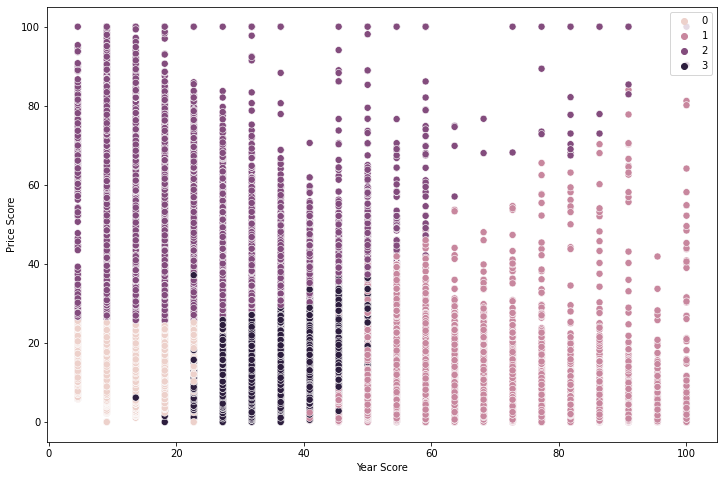

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['year_score'], y=df_cluster['price_score'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year Score')
plt.ylabel('Price Score')
plt.show()

Year score seems to demonstrate very similar characteristics as mileage score, with groupings following similar patterns. 

### Descriptive Statistics

In [26]:
#descriptive statistics for clusters
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'light pink'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'pink'
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 3, 'cluster'] = 'dark purple'

In [27]:
df_cluster.groupby('cluster').agg({'mileage_score':['mean', 'median'], 
                         'year_score':['mean', 'median'], 
                         'price_score':['mean', 'median']})

mileage_score          year_score            price_score  \
                     mean   median       mean     median        mean   
cluster                                                                
dark purple     15.678670  15.3454  33.001461  31.818182    7.887616   
light pink       6.083299   5.9434  17.047206  18.181818   11.109390   
pink            24.707257  24.0057  59.965139  59.090909    4.892462   
purple           5.519974   5.1780  17.998528  18.181818   39.705927   

                        
                median  
cluster                 
dark purple   6.629048  
light pink    9.994583  
pink          3.637399  
purple       35.631253

Note: a high year score demonstrates a newer car.

- The pink cluster has the newest cars.
- The purple cluster is the most expensive when compared to other cars of their own make.

The results we found for these four groups could be useful in helping us identify the types of cars we can find within a make. If we did further analysis by car model, we might be able to sort each model into one of these 4 car types. This would help us understand what different models of a make are valued for, whether for luxury, practicality, etc.

### Merge Cluster Column Back to Original Data

In [16]:
#merge df_cluster back onto original data set to get the clusters column
df_merge = pd.merge(df_cars, df_cluster, on=['mileage_score','year_score','price_score'], indicator = True)

In [17]:
df_merge.head()

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,price_score,clusters,_merge
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,7.1450,22.727273,3.693389,0,both
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,Low Price,Low Mileage,3.9212,27.272727,4.678813,0,both
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,9.7702,27.272727,3.693389,2,both
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,Low Price,Low Mileage,7.9844,22.727273,4.736596,0,both
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,Low Price,Low Mileage,4.4284,13.636364,6.714732,0,both


In [20]:
df_merge = df_merge.drop(columns = ['_merge'])

In [21]:
df_merge.head()

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,price_score,clusters
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,7.1450,22.727273,3.693389,0
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,Low Price,Low Mileage,3.9212,27.272727,4.678813,0
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,9.7702,27.272727,3.693389,2
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,Low Price,Low Mileage,7.9844,22.727273,4.736596,0
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,Low Price,Low Mileage,4.4284,13.636364,6.714732,0


In [ ]:
#

In [22]:
#export combined data
df_merge.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_clusters.csv'))